## GP regression report-Aug 6th

In this report, we are going to compare the MSE and runtime of full GP, approximate GP, and FITC method.

In [28]:
##  import packages ##
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import GPy as gpy
from IPython.display import display
import pylab as pb
from pylab import plot, title, figure, xlabel, ylabel, legend
import random
import time

In [29]:
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.figsize'] = (8,5)

### 1. Data points from sine function

First, we draw data points from sine function. We draw 10000 data points from the function  $y=\sin \left( 2\pi x \right)$ plus some noise. Then, we use these data points to do full GP, approximate GP and FITC.

In [30]:
##  draw 10000 data points ##
num_points = 10000
np.random.seed(100)
x = np.random.uniform(-3.,3.,(num_points,1))
y = np.sin(x*2*np.pi) + 0.3*np.random.randn(num_points,1)

### 1.1 Full GP regression
In order to do GP regression, we need to find the hyperparameters for the kernel. How to find the best hyperparameters for full GP is shown in the appendix. The parameters we find is variance=1.236767, lengthscale=0.306. Then, we do full GP regression on 100,500,1000,1500,2000,2500,3000,3500 data points respectively. We also calculate the MSE and record the running time. Then, we create two plots. In the first plot, the horizontal axis is the number of data points, and the vertical axis is MSE. For the second one, the horizontal axis is also the number of data points, and the vertical axis is runtime.

In [31]:
kernel = gpy.kern.RBF(input_dim=1, variance=1.236767, lengthscale=0.306)
num=[100,500,1000,1500,2000,2500,3000,3500]
##  use two vectors to store MSE and time  ##
mse_fullGP=[]
time_fullGP=[]
for i in range(len(num)):
    start_time = time.time()
    m_fullGP = gpy.models.GPRegression(x[0:num[i]],y[0:num[i]],kernel)
    time_fullGP.append(time.time() - start_time)
    mse_fullGP.append((sum((m_fullGP.predict(x[0:num[i]])[0]-y[0:num[i]])**2))/num[i])

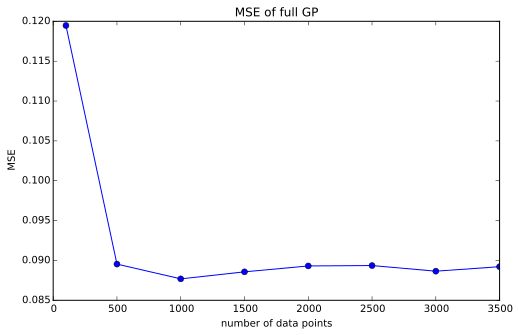

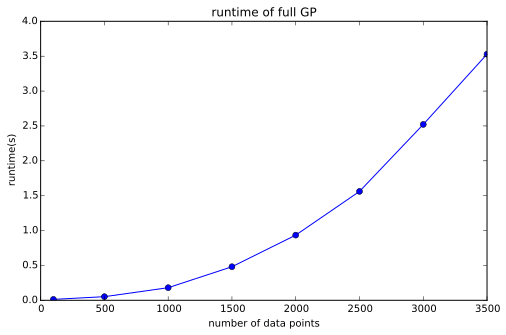

In [21]:
##  create the mse plot for full GP  ##
plot(num,mse_fullGP,num,mse_fullGP,'bo')
title('MSE of full GP')
xlabel('number of data points')
ylabel('MSE')
##  create the time plot for full GP  ##
figure()
plot(num,time_fullGP,num,time_fullGP,'bo')
title('runtime of full GP')
xlabel('number of data points')
ylabel('runtime(s)')

From the first plot we can see that as the number of data points increase, the MSE decrease. This is because the more data points we have, the more accurate we can capture the data. In the second plot, the runtime increase as the data points increase. So there is a trade off between MSE and runtime. The MSE decrease at the expense of more computation.

### 1.2 Approximate GP regression
In the part, we use the approximation method subset of datapoints (SD) to do GP regression. For simplicity, we choose the subset datapoints randomly from the full datapoints. Then, we repeat the same work in the full GP case. 

In [10]:
kernel = gpy.kern.RBF(input_dim=1, variance=1.236767, lengthscale=0.306)
num=[100,500,1000,1500,2000,2500,3000,3500]
mse_SD=[]
time_SD=[]
np.random.seed(100)
for i in range(len(num)):
    ##  choose some data points randomly  ##
    index=random.sample(xrange(num[i]),int(num[i]*0.7))
    start_time = time.time()
    m_SD = gpy.models.GPRegression(x[index],y[index],kernel)
    time_SD.append(time.time() - start_time)
    mse_SD.append((sum((m_SD.predict(x[index])[0]-y[index])**2))/(num[i]*0.7))

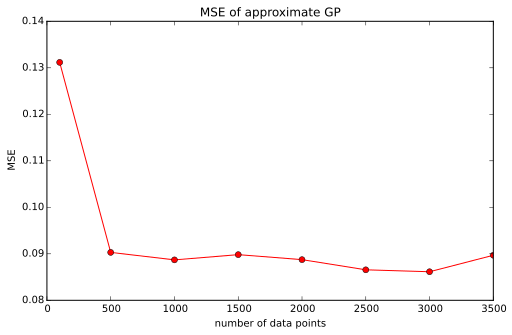

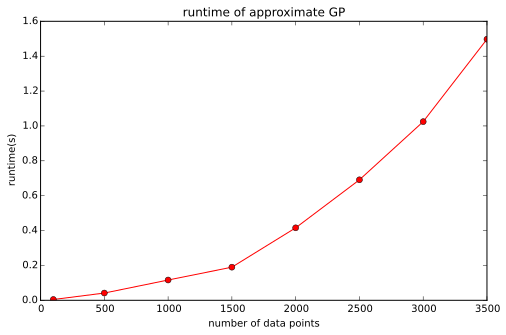

In [22]:
plot(num,mse_SD,'r',num,mse_SD,'ro')
title('MSE of approximate GP')
xlabel('number of data points')
ylabel('MSE')
figure()
plot(num,time_SD,'r',num,time_SD,'ro')
title('runtime of approximate GP')
xlabel('number of data points')
ylabel('runtime(s)')

We can see that the patterns of these two plots are the same as those in full GP case.

### 1.3 FITC approximation
In this part, we are goint to implement FITC approximation. We use 12 inducing inputs, and then we optimize these 12 inducing inputs and the hyperparameters. The code is included in the appendix. Then, we repeat the same process, and remake the MSE and running time plots. 

In [70]:
kernel = gpy.kern.RBF(input_dim=1, variance=0.091556, lengthscale=0.25)
Z = m.inducing_inputs
num=[100,500,1000,1500,2000,2500,3000,3500]
mse_FITC=[]
time_FITC=[]
for i in range(len(num)):
    start_time = time.time()
    m_FITC = gpy.models.SparseGPRegression(X=x[0:num[i]],Y=y[0:num[i]],Z=Z,kernel=kernel)
    time_FITC.append(time.time() - start_time)
    mse_FITC.append((sum((m_FITC.predict(x[0:num[i]])[0]-y[0:num[i]])**2))/num[i])

(0, 0.1)

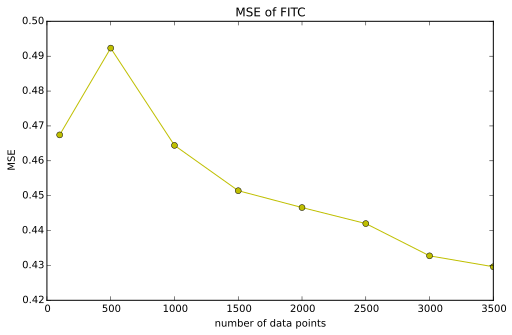

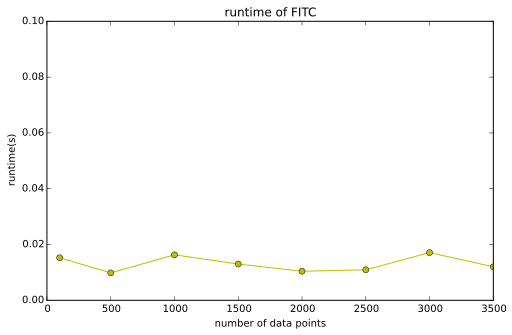

In [73]:
plot(num,mse_FITC,'y',num,mse_FITC,'yo')
title('MSE of FITC')
xlabel('number of data points')
ylabel('MSE')
figure()
plot(num,time_FITC,'y',num,time_FITC,'yo')
title('runtime of FITC')
xlabel('number of data points')
ylabel('runtime(s)')
plt.ylim(0,0.1)

As we can see in these two plots, the patterns are the same as full GP and approximate GP. In order to compare these three methods, we combine these three methods in two plots. 

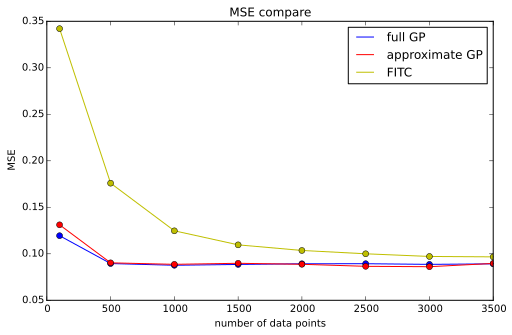

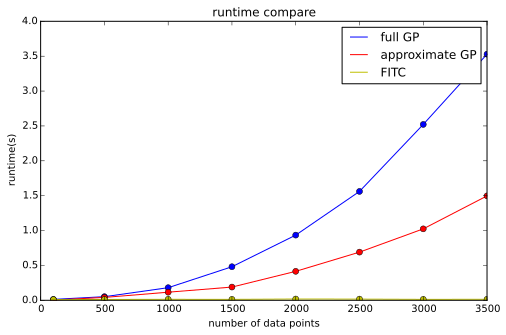

In [19]:
figure()
plot(num,mse_fullGP,'b',label='full GP')
plot(num,mse_fullGP,'bo')
plot(num,mse_SD,'r',label='approximate GP')
plot(num,mse_SD,'ro')
plot(num,mse_FITC,'y',label='FITC')
plot(num,mse_FITC,'yo')
legend()
title('MSE compare')
xlabel('number of data points')
ylabel('MSE')

figure()
plot(num,time_fullGP,'b',label='full GP')
plot(num,time_fullGP,'bo')
plot(num,time_SD,'r',label='approximate GP')
plot(num,time_SD,'ro')
plot(num,time_FITC,'y',label='FITC')
plot(num,time_FITC,'yo')
legend()
title('runtime compare')
xlabel('number of data points')
ylabel('runtime(s)')

In the run time plot, we find that the full GP's run time is the longest. As the number of data points increase, the runtime of full GP is increasing very fast, so the full GP is not computation efficient. This is also our motivation for the approximation methods. The runtime of approximate GP is shorter than full GP, which is what we expected because the purpose of approximation is to reduce computation. The run time of FITC method is the shortest, and it is much shorter than the other two methods. As the number of data points increase, there is not significant increase of runtime, so the FITC method is computational efficient for large datasets.

In the MSE plot, the full GP has the smallest MSE. This is because full GP can capture the data very well. The approximate GP has larger MSE than full GP, and the MSE of FITC is the largest. The FITC performs worse in this case. This is because FITC perform well only near the inducing inputs, for the points far from inducing inputs, FITC cannot fit the data very well. In this case, our function $y=\sin \left( 2\pi x \right)$ is complex, but we only have 12 inducing inputs. So the FITC performs worse. This conclusion for FITC is similar to the conclusion in Snelson and Ghahramani's FITC paper. 

In the next part, we are going to use a simpler function to discuss the performance of FITC

### 2. Data points from simpler function

In this part, we draw data points from $y=-\cos \left( \pi x \right)+\sin \left( 2\pi x \right)$ on the interval [-1,1]. Then we do the same work as in part 1. The only difference is we draw data points from a simpler function.

In [10]:
##  draw 10000 data points ##
num_points = 10000
np.random.seed(100)
x = np.random.uniform(-1.0,1.0,(num_points,1))
y = -np.cos(x*np.pi)+np.sin(2*x*np.pi) + 0.3*np.random.randn(num_points,1)

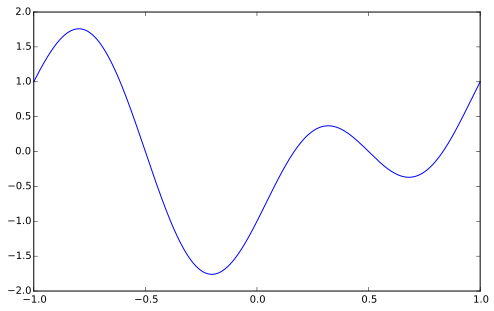

In [11]:
x_1 = np.linspace(-1.,1.,1000)  
x_1 = x_1[:,None]  
y_1 = -np.cos(x_1*np.pi)+np.sin(2*x_1*np.pi) 
plot(x_1,y_1)

The plot above is the function we use to draw the data points. This function on the interval[-1,1] is less complex than the function in part 1, so we expect FITC perform better in this case. Next we make the MSE and runtime plot again.

In [20]:
##  find the best parameter for full GP  ##
kernel = gpy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
m = gpy.models.GPRegression(x[0:1000],y[0:1000],kernel)
m.optimize_restarts(num_restarts = 10)
display(m)

Optimization restart 1/10, f = 236.995649264
Optimization restart 2/10, f = 236.995649274
Optimization restart 3/10, f = 236.995649265
Optimization restart 4/10, f = 236.995649265
Optimization restart 5/10, f = 236.995649264
Optimization restart 6/10, f = 236.99564933
Optimization restart 7/10, f = 236.995649265
Optimization restart 8/10, f = 236.995649265
Optimization restart 9/10, f = 236.995649264
Optimization restart 10/10, f = 236.995649264


In [23]:
##  conduct full GP regression ##
kernel = gpy.kern.RBF(input_dim=1, variance=2.5435, lengthscale=0.366)
num=[100,500,1000,1500,2000,2500,3000,3500]
mse_fullGP=[]
time_fullGP=[]
for i in range(len(num)):
    start_time = time.time()
    m_fullGP = gpy.models.GPRegression(x[0:num[i]],y[0:num[i]],kernel)
    time_fullGP.append(time.time() - start_time)
    mse_fullGP.append((sum((m_fullGP.predict(x[0:num[i]])[0]-y[0:num[i]])**2))/num[i])

In [24]:
##  conduct approximate GP  ##
kernel = gpy.kern.RBF(input_dim=1, variance=2.5435, lengthscale=0.366)
num=[100,500,1000,1500,2000,2500,3000,3500]
mse_SD=[]
time_SD=[]
np.random.seed(100)
for i in range(len(num)):
    ##  choose some data points randomly  ##
    index=random.sample(xrange(num[i]),int(num[i]*0.7))
    start_time = time.time()
    m_SD = gpy.models.GPRegression(x[index],y[index],kernel)
    time_SD.append(time.time() - start_time)
    mse_SD.append((sum((m_SD.predict(x[index])[0]-y[index])**2))/(num[i]*0.7))

Optimization restart 1/10, f = 252.978449581
Optimization restart 2/10, f = 252.978449467
Optimization restart 3/10, f = 252.978449438
Optimization restart 4/10, f = 252.97844943
Optimization restart 5/10, f = 252.978449413
Optimization restart 6/10, f = 484.389484681
Optimization restart 7/10, f = 252.978449421
Optimization restart 8/10, f = 252.978449441
Optimization restart 9/10, f = 252.97844941
Optimization restart 10/10, f = 252.978449414


  Index  |  sparse_gp_mpi.inducing_inputs  |  Constraint  |   Prior   |  Tied to
  [0 0]  |                      0.1923645  |              |           |    N/A    
  [1 0]  |                    -0.58021664  |              |           |    N/A    
  [2 0]  |                     0.90972641  |              |           |    N/A    
  [3 0]  |                    -0.19384963  |              |           |    N/A    
  [4 0]  |                      0.5758274  |              |           |    N/A    
  [5 0]  |                    -0.89236558  |              |           |    N/A    


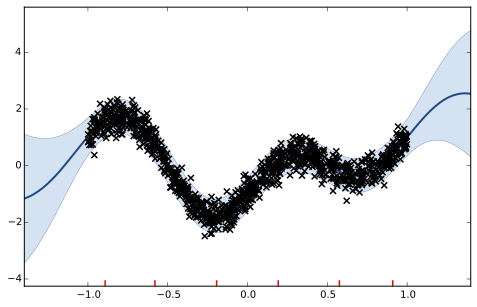

In [25]:
##  find the best hyperparameter and inducing inputs for FITC ##
Z = np.linspace(-3.0,3.0,6)[:,None]
m = gpy.models.SparseGPRegression(x[0:1000],y[0:1000],Z=Z)
m.optimize_restarts(num_restarts = 10)
m.plot()
display(m)
print m.inducing_inputs

In [26]:
##  do FITC  ##
kernel = gpy.kern.RBF(input_dim=1, variance=2.81, lengthscale=0.466)
Z = m.inducing_inputs
num=[100,500,1000,1500,2000,2500,3000,3500]
mse_FITC=[]
time_FITC=[]
for i in range(len(num)):
    start_time = time.time()
    m_FITC = gpy.models.SparseGPRegression(X=x[0:num[i]],Y=y[0:num[i]],Z=Z,kernel=kernel)
    time_FITC.append(time.time() - start_time)
    mse_FITC.append((sum((m_FITC.predict(x[0:num[i]])[0]-y[0:num[i]])**2))/num[i])

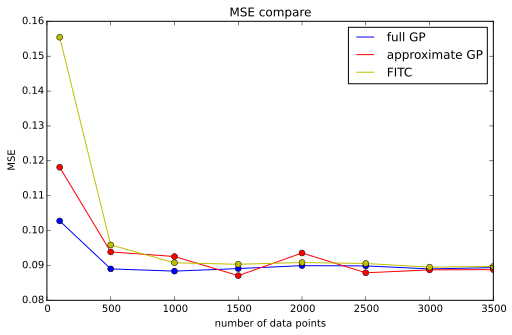

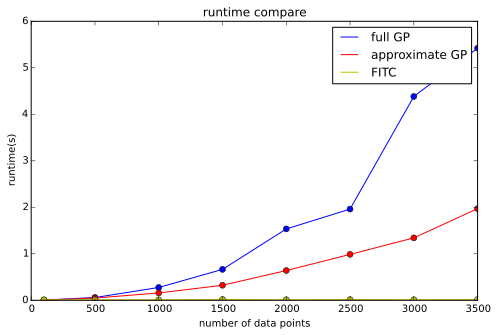

In [27]:
##  make the MSE and runtime plot  ##
figure()
plot(num,mse_fullGP,'b',label='full GP')
plot(num,mse_fullGP,'bo')
plot(num,mse_SD,'r',label='approximate GP')
plot(num,mse_SD,'ro')
plot(num,mse_FITC,'y',label='FITC')
plot(num,mse_FITC,'yo')
legend()
title('MSE compare')
xlabel('number of data points')
ylabel('MSE')

figure()
plot(num,time_fullGP,'b',label='full GP')
plot(num,time_fullGP,'bo')
plot(num,time_SD,'r',label='approximate GP')
plot(num,time_SD,'ro')
plot(num,time_FITC,'y',label='FITC')
plot(num,time_FITC,'yo')
legend()
title('runtime compare')
xlabel('number of data points')
ylabel('runtime(s)')

In the MSE plot, FITC method performs much better than before. This is because after we draw data points from a simpler function, the data points are easy to capture for FITC. 

### Appendix
### A. Find the best hyperparameter for full GP  

In [72]:
##  find the best parameter for full GP  ##
kernel = gpy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
m = gpy.models.GPRegression(x[0:1000],y[0:1000],kernel)
m.optimize_restarts(num_restarts = 10)
display(m)

Optimization restart 1/10, f = 1502.77727349
Optimization restart 2/10, f = 1502.77727355
Optimization restart 3/10, f = 1834.7331316
Optimization restart 4/10, f = 1502.7772735
Optimization restart 5/10, f = 1502.77727351
Optimization restart 6/10, f = 1502.77727349
Optimization restart 7/10, f = 1502.77727354
Optimization restart 8/10, f = 1502.7772735
Optimization restart 9/10, f = 1502.77727349
Optimization restart 10/10, f = 1502.77727349


In [4]:
##  find the best parameter for full GP  ##
kernel = gpy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
m = gpy.models.GPRegression(x[0:1000],y[0:1000],kernel)
m.optimize_restarts(num_restarts = 10)
display(m)

Optimization restart 1/10, f = 267.437922616
Optimization restart 2/10, f = 267.437922549
Optimization restart 3/10, f = 267.437922548
Optimization restart 4/10, f = 267.437922548
Optimization restart 5/10, f = 267.437922548
Optimization restart 6/10, f = 267.437922548
Optimization restart 7/10, f = 267.437922551
Optimization restart 8/10, f = 267.437922552
Optimization restart 9/10, f = 267.437922548
Optimization restart 10/10, f = 267.43792282


### B. Find the best hyperparameter for FITC 

Optimization restart 1/10, f = 598.527404393
Optimization restart 2/10, f = 624.738113308
Optimization restart 3/10, f = 413.924635771
Optimization restart 4/10, f = 611.961811244
Optimization restart 5/10, f = 413.92463616
Optimization restart 6/10, f = 883.970674891
Optimization restart 7/10, f = 413.924635832
Optimization restart 8/10, f = 596.521647526
Optimization restart 9/10, f = 716.097939783
Optimization restart 10/10, f = 955.177833426


   Index   |  sparse_gp_mpi.inducing_inputs  |  Constraint  |   Prior   |  Tied to
   [0 0]   |                     -1.2631385  |              |           |    N/A    
   [1 0]   |                    -0.25208439  |              |           |    N/A    
   [2 0]   |                     0.24446996  |              |           |    N/A    
   [3 0]   |                     -2.2742594  |              |           |    N/A    
   [4 0]   |                      2.2713376  |              |           |    N/A    
   [5 0]   |                    -0.75365243  |              |           |    N/A    
   [6 0]   |                     -2.6495051  |              |           |    N/A    
   [7 0]   |                     -1.7563976  |              |           |    N/A    
   [8 0]   |                      1.7837164  |              |           |    N/A    
   [9 0]   |                      1.2249381  |              |           |    N/A    
  [10  0]  |                      2.6208349  |              |      

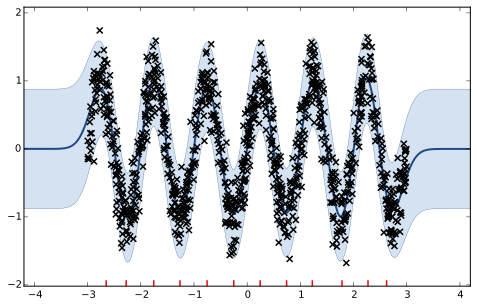

In [14]:
##  find the best hypermaters and inducing inputs for FITC  ##
Z = np.linspace(-3.0,3.0,12)[:,None]
m = gpy.models.SparseGPRegression(x[0:1000],y[0:1000],Z=Z)
m.optimize_restarts(num_restarts = 10)
m.plot()
display(m)
print m.inducing_inputs